In [14]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Annotated,Literal


In [15]:
class QuadState(TypedDict):
    a:int
    b:int
    c:int
    
    equation:str
    discriminant:float
    result:str

In [16]:
def show_equation(state:QuadState):
    equation = f'{state['a']}x2{state['b']}x{state['c']}'
    return {"equation":equation}
    



def caluclate_discriminant(state:QuadState):
    discriminant = state['b']**2 - (4*state['a']*state['c'])
    return {'discriminant':discriminant}


In [21]:
def real_roots(state:QuadState):
    root1 = (-state['b'] + state['discriminant']**0.5)/(2*state['a'])
    root2 = (-state['b'] - state['discriminant']**0.5)/(2*state['a'])
    
    result = f'The roots are {root1} and {root2}' 
    return {'result':result}


def repeated_roots(state: QuadState):

    root = (-state["b"])/(2*state["a"])

    result = f'Only repeating root is {root}'

    return {'result': result}


def no_real_roots(state: QuadState):

    result = f'No real roots'

    return {'result': result}



def check_condition(state:QuadState) -> Literal["real_roots", "repeated_roots", "no_real_roots"]:
    if state['discriminant'] > 0:
        return "real_roots"
    elif state['discriminant'] == 0:
        return "repeated_roots"
    else:
        return "no_real_roots"

    

In [22]:
graph = StateGraph(QuadState)

# createe nodes
graph.add_node('show_equation',show_equation)
graph.add_node('caluclate_discriminant',caluclate_discriminant)

graph.add_node('real_roots',real_roots)
graph.add_node('repeated_roots',repeated_roots)
graph.add_node('no_real_roots',no_real_roots)

# create Edges
graph.add_edge(START,'show_equation')
graph.add_edge('show_equation','caluclate_discriminant')
graph.add_conditional_edges('caluclate_discriminant',check_condition)
graph.add_edge('real_roots',END)
graph.add_edge('repeated_roots',END)
graph.add_edge('no_real_roots',END)

# compile the graph

workflow = graph.compile()

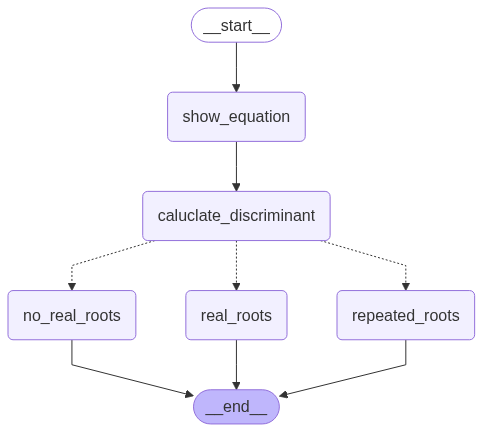

In [23]:
workflow

In [26]:
initial_state = {
    'a':2,
    'b':4,
    'c':2
}

workflow.invoke(initial_state)

{'a': 2,
 'b': 4,
 'c': 2,
 'equation': '2x24x2',
 'discriminant': 0,
 'result': 'Only repeating root is -1.0'}